In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Amzon_dataset/amazon.csv'
dataset = pd.read_csv(file_path)


In [ ]:
# Basic EDA
print(dataset.info())
print(dataset.head())

# Check for missing values
print("Missing values:\n", dataset.isnull().sum())

# Label distribution
print("Label distribution:\n", dataset['label'].value_counts())

# Review lengths
dataset['review_length'] = dataset['Text'].apply(len)
print("Review length stats:\n", dataset['review_length'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None
                                                Text  label
0  This is  the best apps acording to a bunch of ...      1
1  This is a pretty good version of the game for ...      1
2  this is a really . there are a bunch of levels...      1
3  This is a silly game and can be frustrating, b...      1
4  This is a terrific game on any pad. Hrs of fun...      1
Missing values:
 Text     0
label    0
dtype: int64
Label distribution:
 label
1    15230
0     4766
Name: count, dtype: int64
Review length stats:
 count    19996.000000
mean       175.787257
std         58.964840
min          3.000000
25%        123.000000
50%        164.000000
75%        254.000000
max        254.000000
Name: 

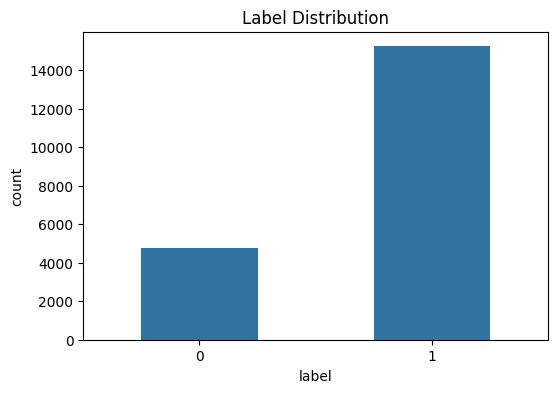

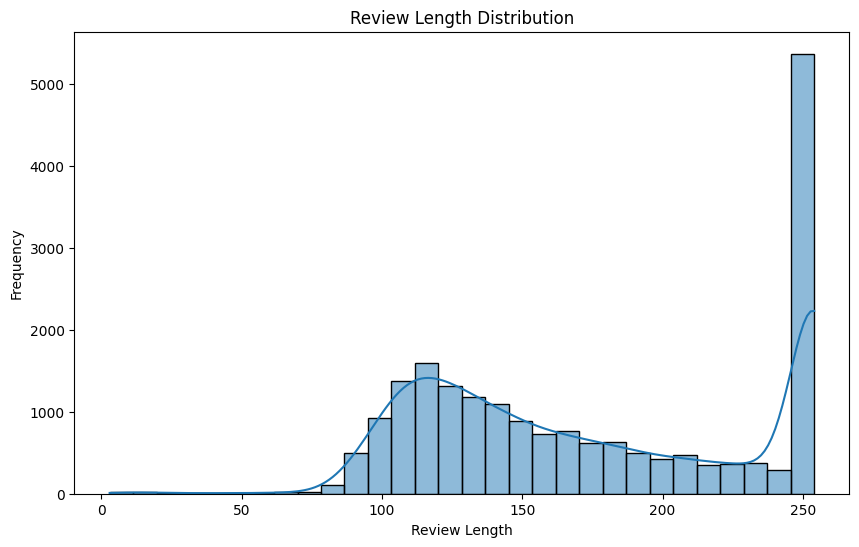

In [ ]:
# Visualize label distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=dataset, width=0.5)
plt.title('Label Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(dataset['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Text Cleaning
import re

predefined_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these',
    'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
    'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

def clean_text_alternative(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in predefined_stopwords])
    return text

dataset['cleaned_text'] = dataset['Text'].apply(clean_text_alternative)

In [ ]:
# Feature Extraction and Model Training
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_text'], dataset['label'], test_size=0.30, random_state=40)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Using Support Vector Machine for classification
svm_model = SVC(kernel='linear', random_state=11)
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3%}')
print(classification_report(y_test, y_pred))

Accuracy: 89.515%
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1391
           1       0.91      0.95      0.93      4608

    accuracy                           0.90      5999
   macro avg       0.87      0.83      0.85      5999
weighted avg       0.89      0.90      0.89      5999



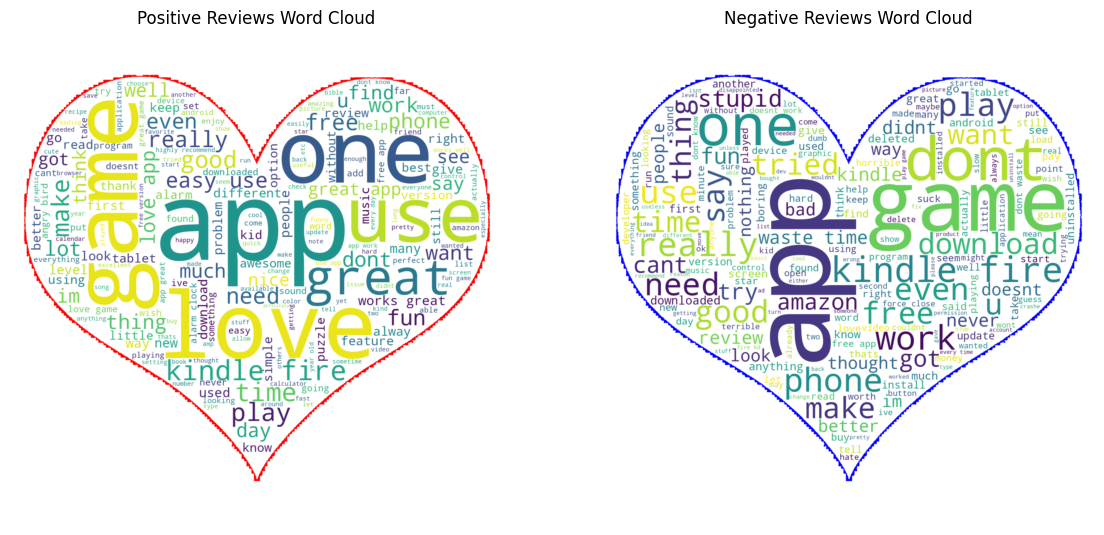

In [ ]:
# Load the heart image
from PIL import Image
import numpy as np

heart_image_path = '/content/drive/MyDrive/Dataset/heart_shape.jpg'  # Update this path
heart_mask = np.array(Image.open(heart_image_path))

# Generate Word Clouds with the Heart Shape
from wordcloud import WordCloud

positive_reviews = dataset[dataset['label'] == 1]['cleaned_text']
negative_reviews = dataset[dataset['label'] == 0]['cleaned_text']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=800, background_color='white', mask=heart_mask, contour_width=3, contour_color='red').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=800, background_color='white', mask=heart_mask, contour_width=3, contour_color='blue').generate(negative_text)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


In [ ]:
from sklearn.metrics import hinge_loss

# Calculate hinge loss
loss = hinge_loss(y_test, y_pred)
print(f'Hinge Loss: {loss:.4f}')


Hinge Loss: 0.3367


In [ ]:
from sklearn.metrics import zero_one_loss
zero_one_loss_value = zero_one_loss(y_test, y_pred)
print(f'0-1 Loss: {zero_one_loss_value:.3f}')

0-1 Loss: 0.105
